# **Data Preprocessing**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('secondary_data.csv',sep=';', on_bad_lines='skip')
# Display the first few rows of the dataset
data.head()


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


# **Data Cleaning**

In [2]:
# Check for missing values
print("Missing values before cleaning:")
print(data.isnull().sum())

# Handle missing values
for col in data.columns:
    if data[col].dtype == 'object':  # nominal variables
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:  # metrical variables
        data[col].fillna(data[col].median(), inplace=True)

# Check for duplicate rows
print("Duplicate rows before cleaning:", data.duplicated().sum())

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Check for missing values after cleaning
print("Missing values after cleaning:")
print(data.isnull().sum())

# Check for duplicate rows after cleaning
print("Duplicate rows after cleaning:", data.duplicated().sum())


Missing values before cleaning:
class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64
Duplicate rows before cleaning: 146
Missing values after cleaning:
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             

# **Exploratory Data Analysis**

In [3]:
# Display value counts for non-numeric columns
nominal_vars = data.select_dtypes(include=['object']).columns
for var in nominal_vars:
    print(f"Value counts for {var}:")
    print(data[var].value_counts())
    print("\n")


Value counts for class:
class
p    33742
e    27181
Name: count, dtype: int64


Value counts for cap-shape:
cap-shape
x    26932
f    13404
s     7164
b     5694
o     3316
p     2598
c     1815
Name: count, dtype: int64


Value counts for cap-surface:
cap-surface
t    22304
s     7580
y     6341
h     4974
g     4722
d     4432
e     2584
k     2303
i     2225
w     2150
l     1308
Name: count, dtype: int64


Value counts for cap-color:
cap-color
n    24205
y     8541
w     7649
g     4312
e     4035
o     3653
r     1779
u     1709
p     1703
k     1279
b     1230
l      828
Name: count, dtype: int64


Value counts for does-bruise-or-bleed:
does-bruise-or-bleed
f    50333
t    10590
Name: count, dtype: int64


Value counts for gill-attachment:
gill-attachment
a    22552
d    10247
x     7413
p     6001
e     5648
s     5648
f     3414
Name: count, dtype: int64


Value counts for gill-spacing:
gill-spacing
c    49744
d     7765
f     3414
Name: count, dtype: int64


Value counts for g

        class  cap-diameter cap-shape cap-surface cap-color  \
count   60923  60923.000000     60923       60923     60923   
unique      2           NaN         7          11        12   
top         p           NaN         x           t         n   
freq    33742           NaN     26932       22304     24205   
mean      NaN      6.741957       NaN         NaN       NaN   
std       NaN      5.268435       NaN         NaN       NaN   
min       NaN      0.380000       NaN         NaN       NaN   
25%       NaN      3.490000       NaN         NaN       NaN   
50%       NaN      5.880000       NaN         NaN       NaN   
75%       NaN      8.550000       NaN         NaN       NaN   
max       NaN     62.340000       NaN         NaN       NaN   

       does-bruise-or-bleed gill-attachment gill-spacing gill-color  \
count                 60923           60923        60923      60923   
unique                    2               7            3         12   
top                       f   

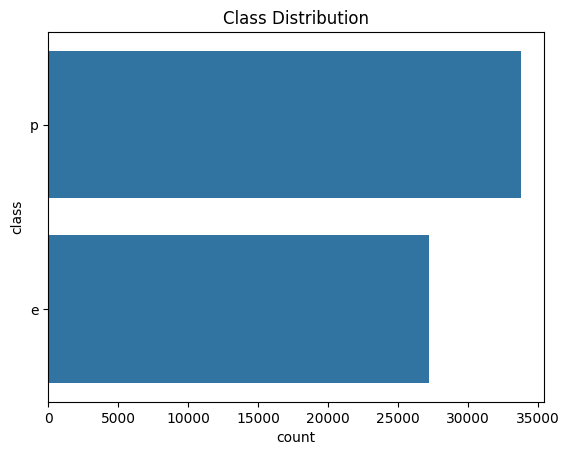

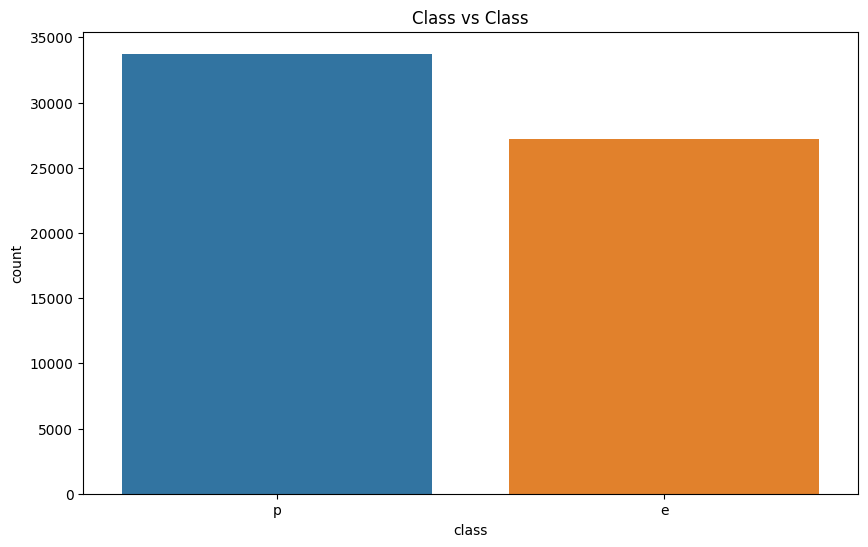

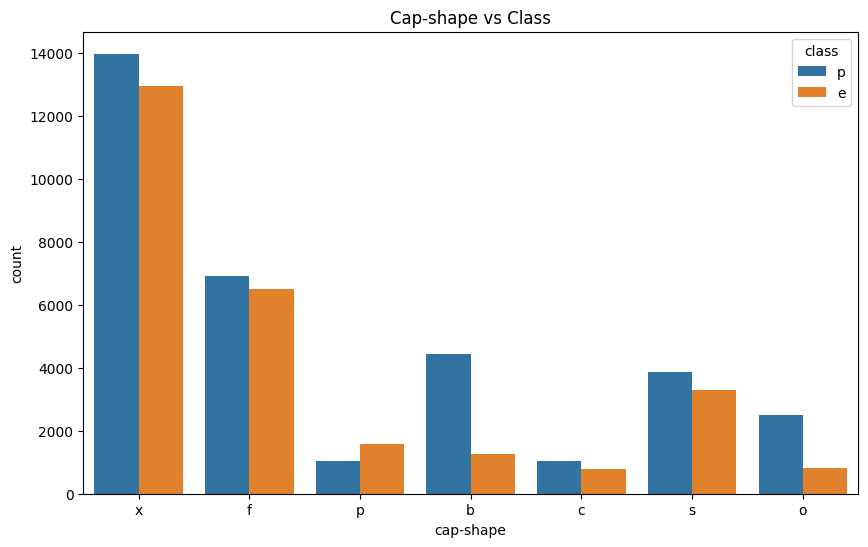

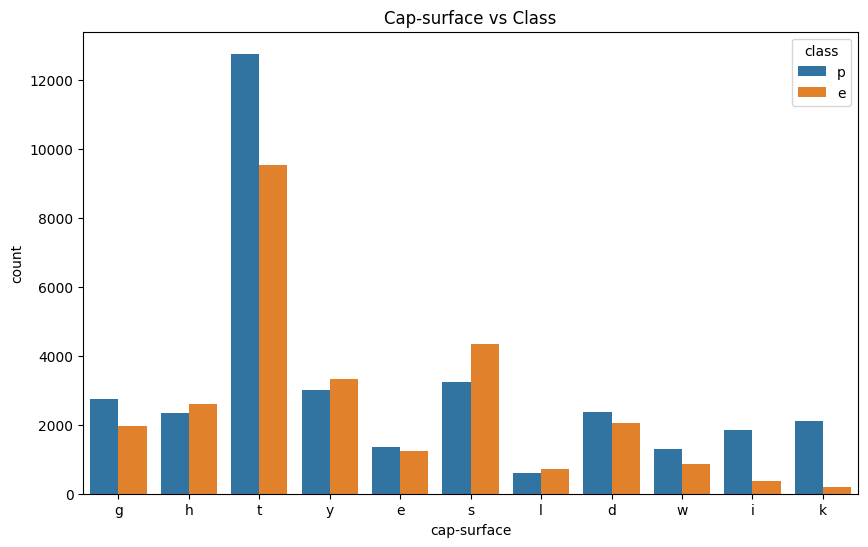

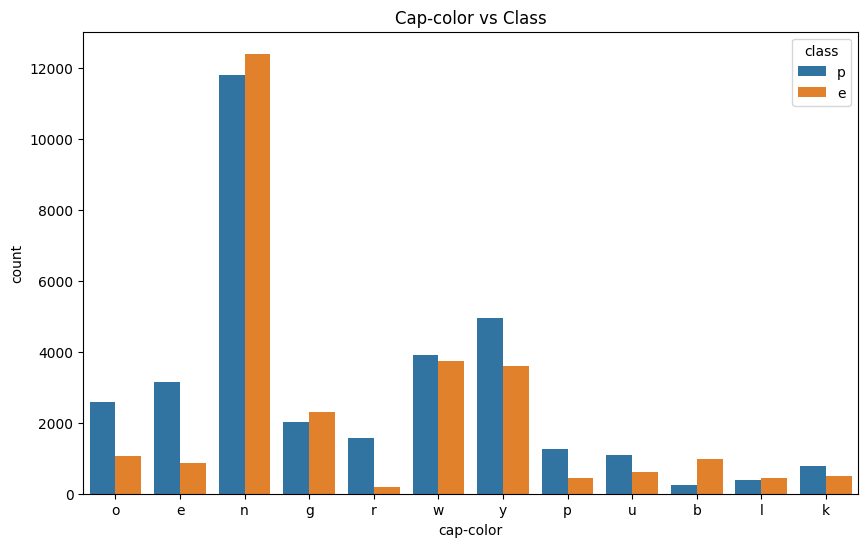

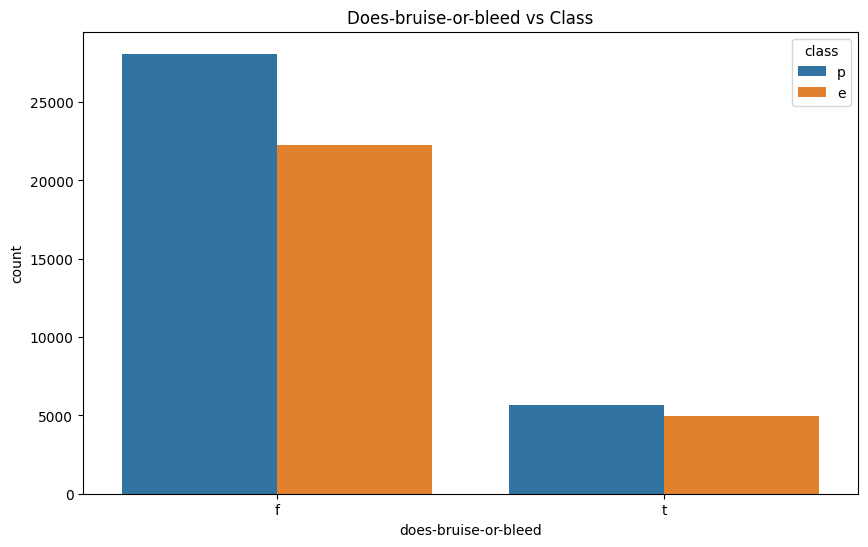

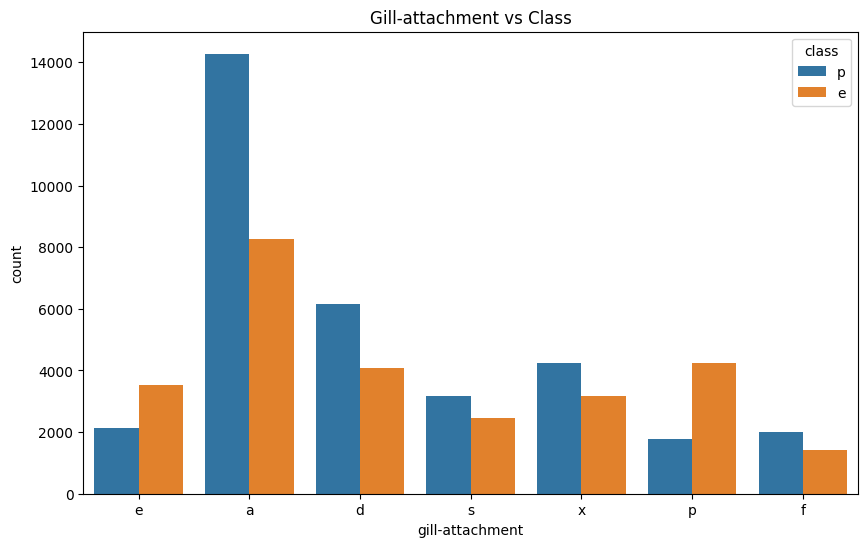

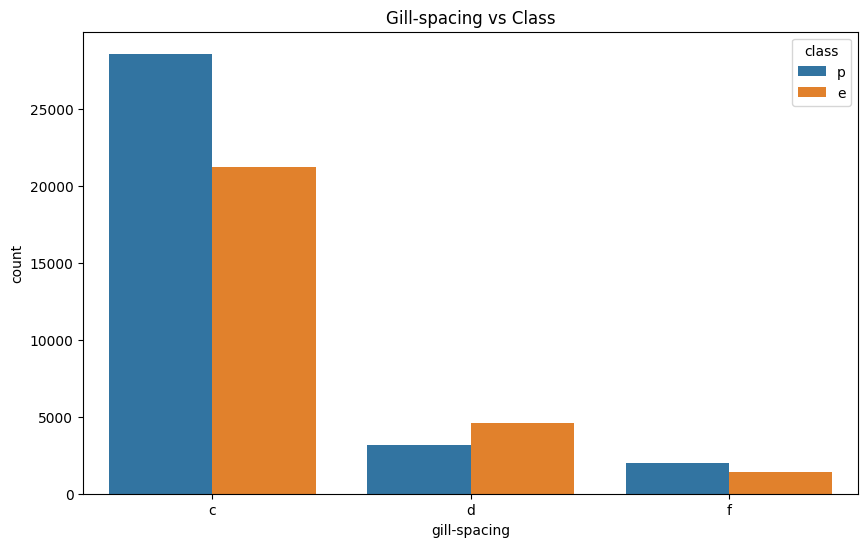

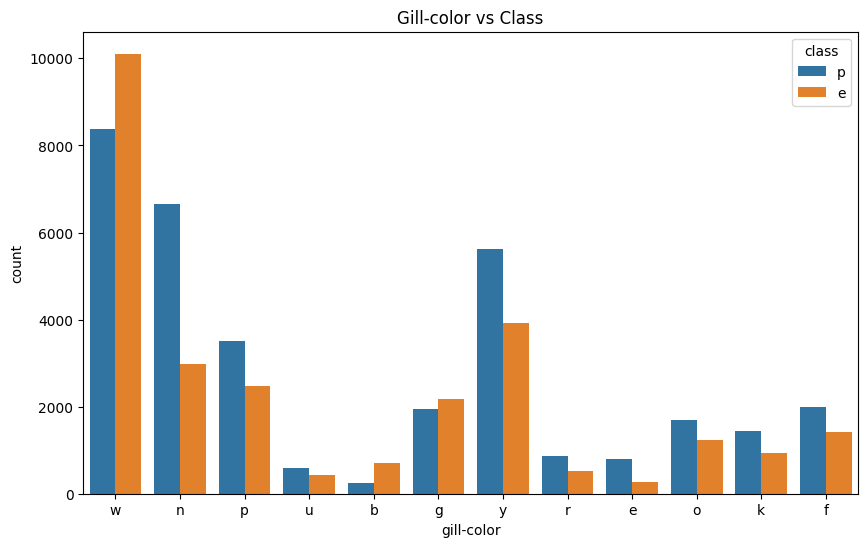

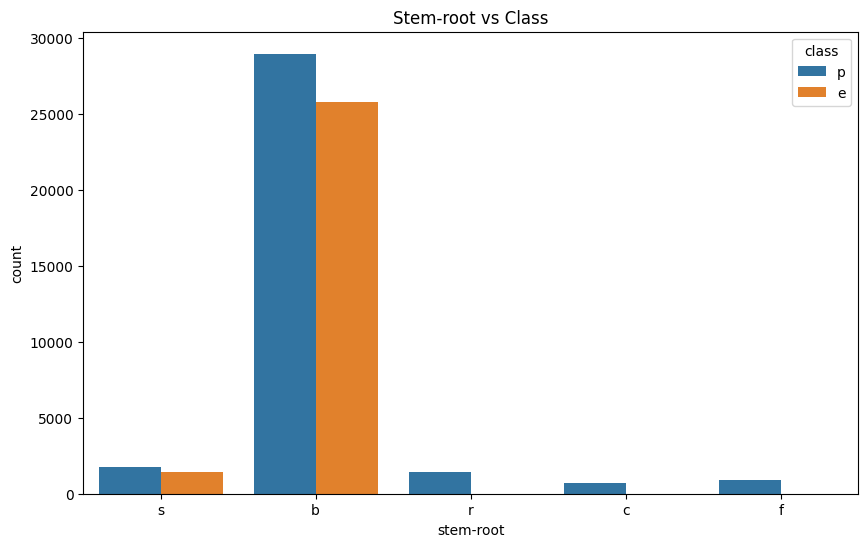

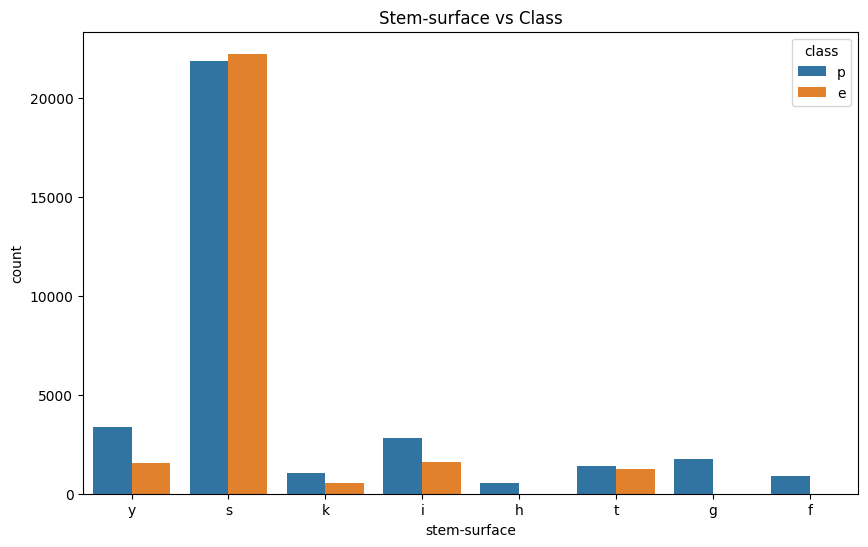

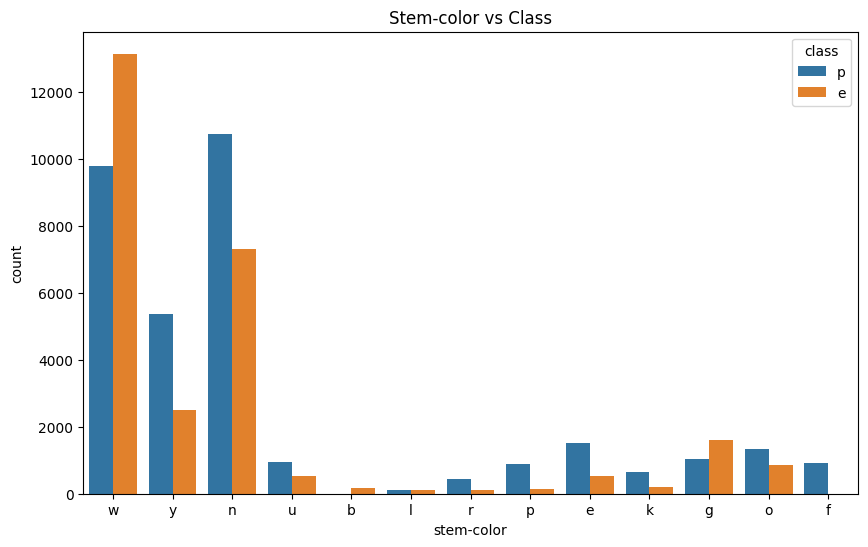

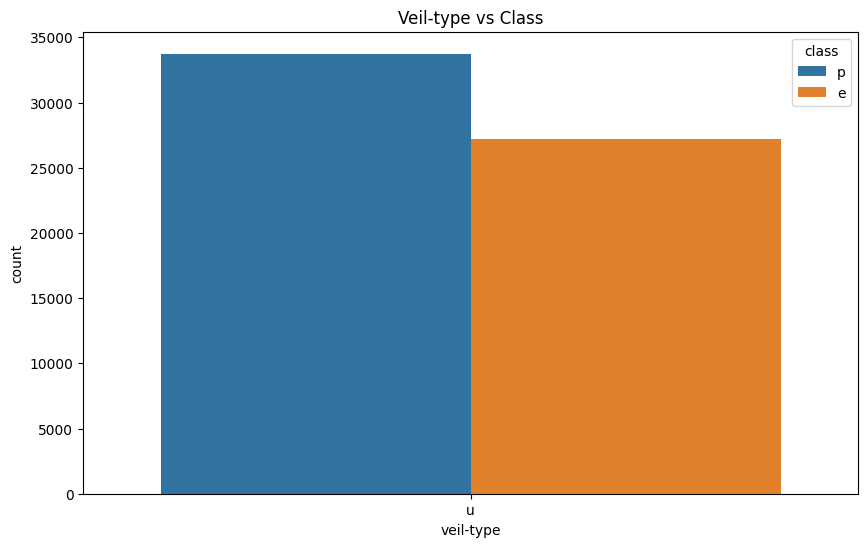

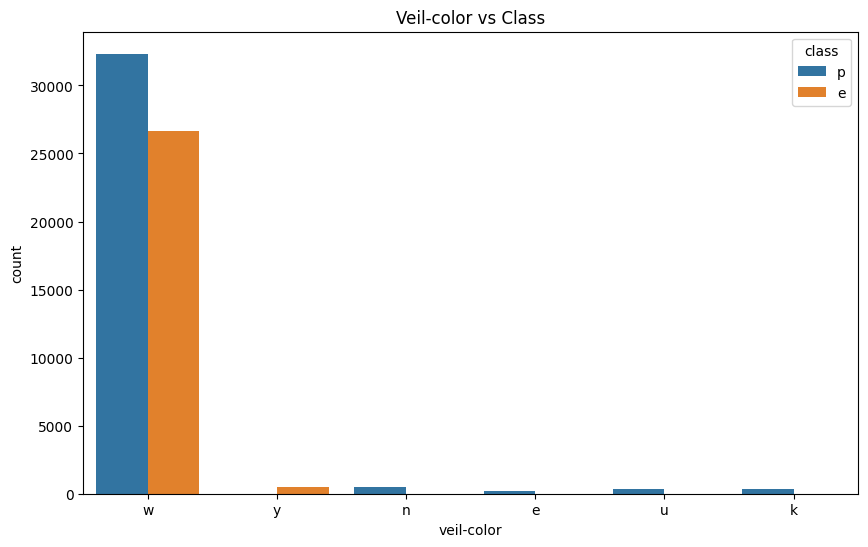

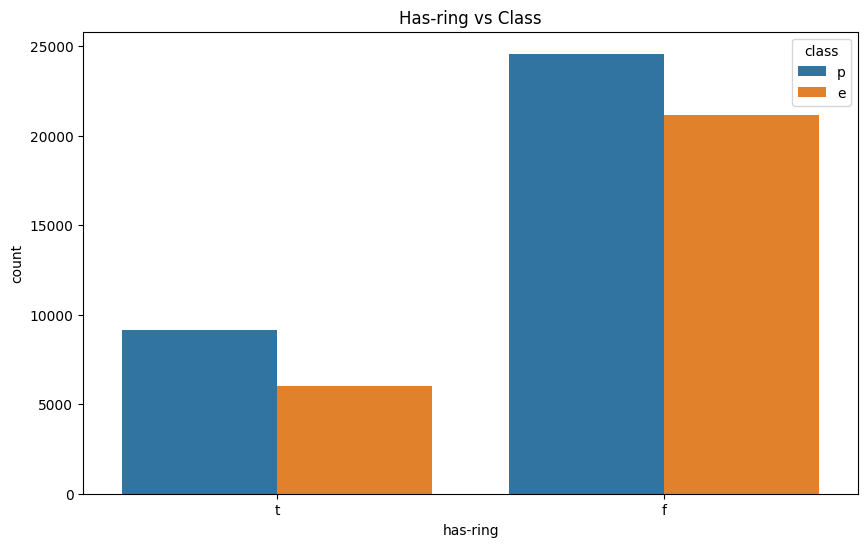

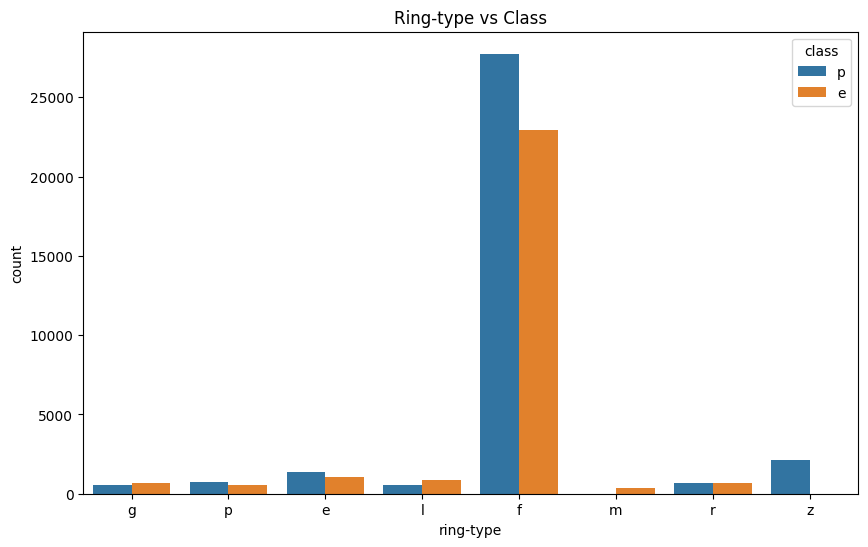

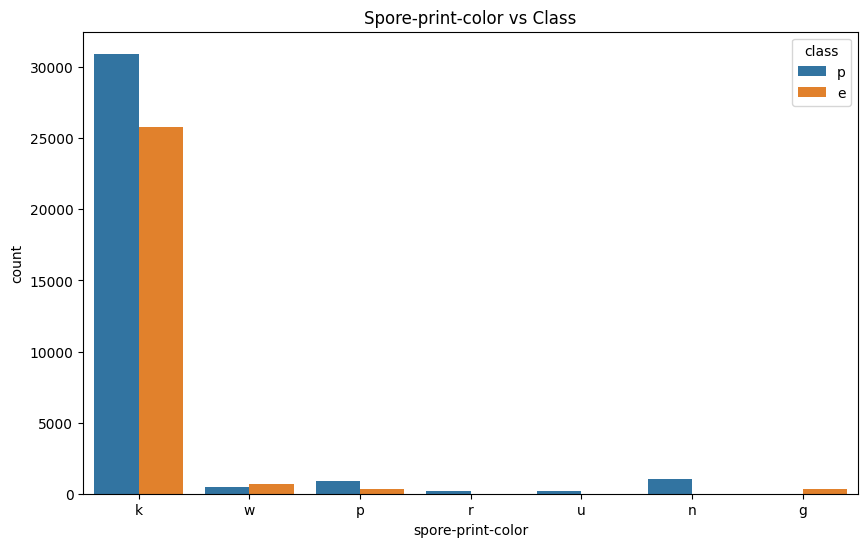

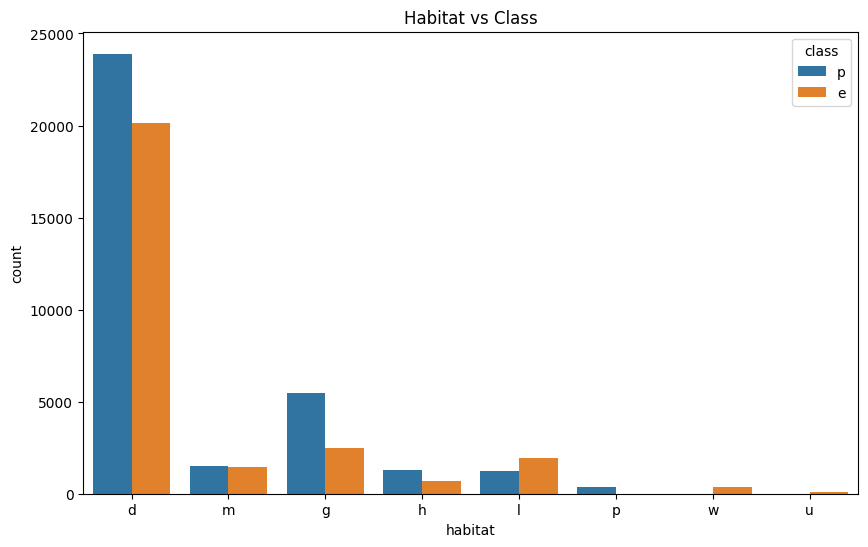

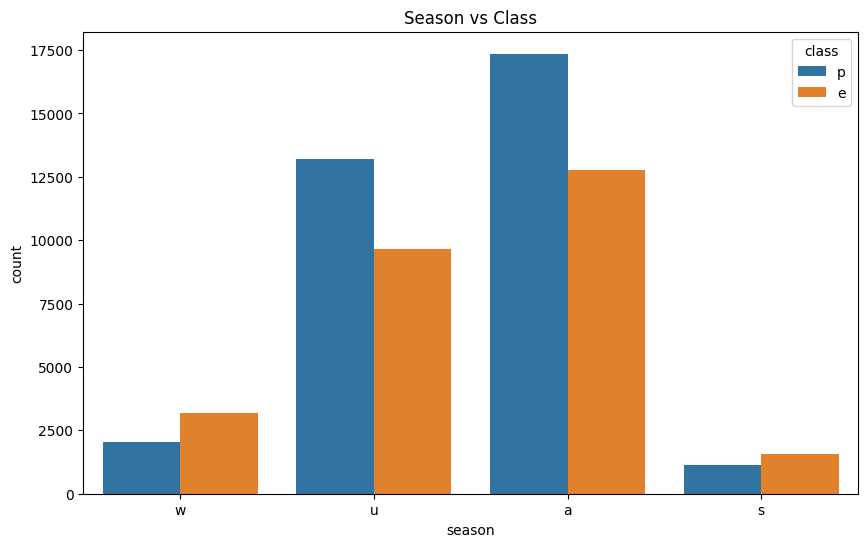

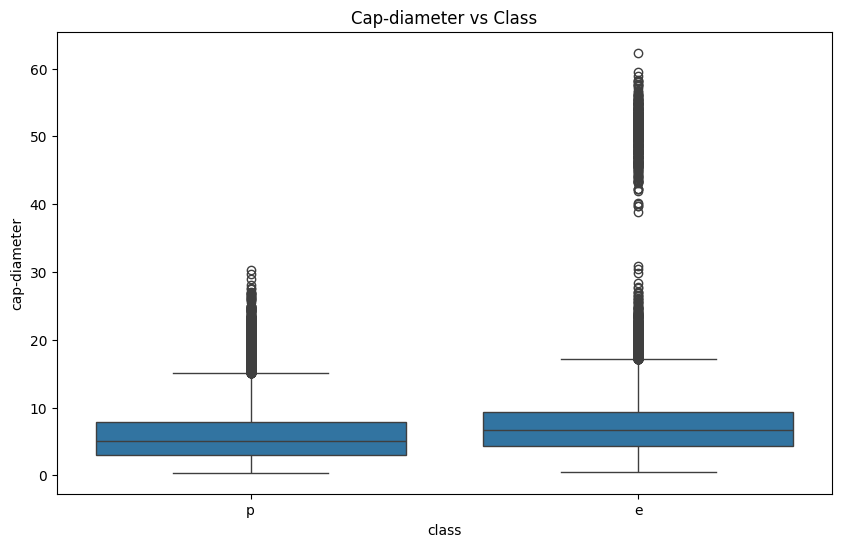

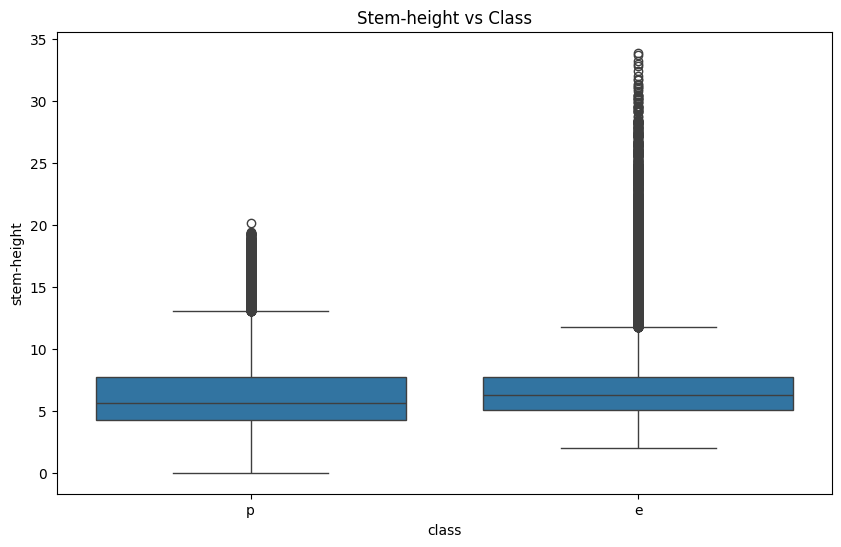

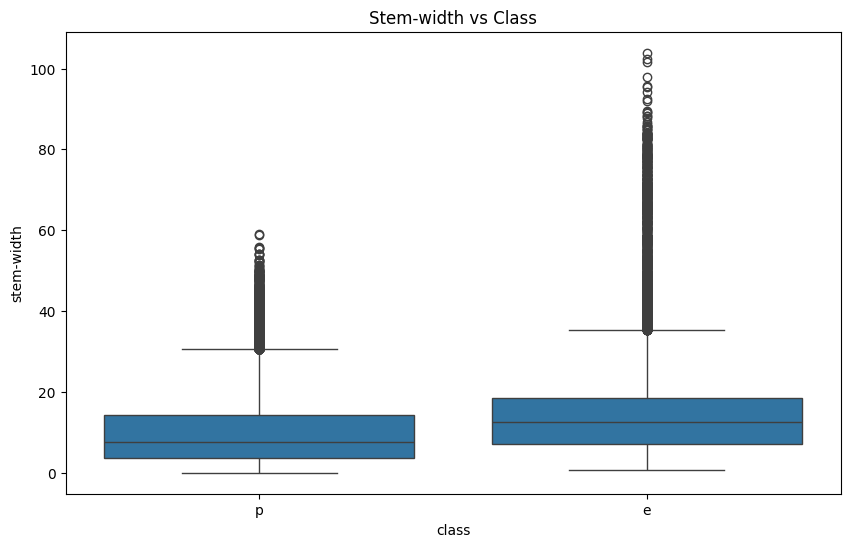

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe(include='all'))

# Class distribution
sns.countplot(data['class'])
plt.title('Class Distribution')
plt.show()

# Visualize nominal variables
nominal_vars = data.select_dtypes(include=['object']).columns
for var in nominal_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, hue='class', data=data)
    plt.title(f'{var.capitalize()} vs Class')
    plt.show()

# Visualize metrical variables
metrical_vars = data.select_dtypes(include=['float']).columns
for var in metrical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='class', y=var, data=data)
    plt.title(f'{var.capitalize()} vs Class')
    plt.show()


# **Data Preprocessing**

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode nominal variables
encoder = LabelEncoder()
for var in nominal_vars:
    data[var] = encoder.fit_transform(data[var])

# Scale metrical variables
scaler = StandardScaler()
data[metrical_vars] = scaler.fit_transform(data[metrical_vars])

# Split data into features and target variable
X = data.drop('class', axis=1)
y = data['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Regular Machine Learning Algorithm**

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9999179318834632
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5365
           1       1.00      1.00      1.00      6820

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185



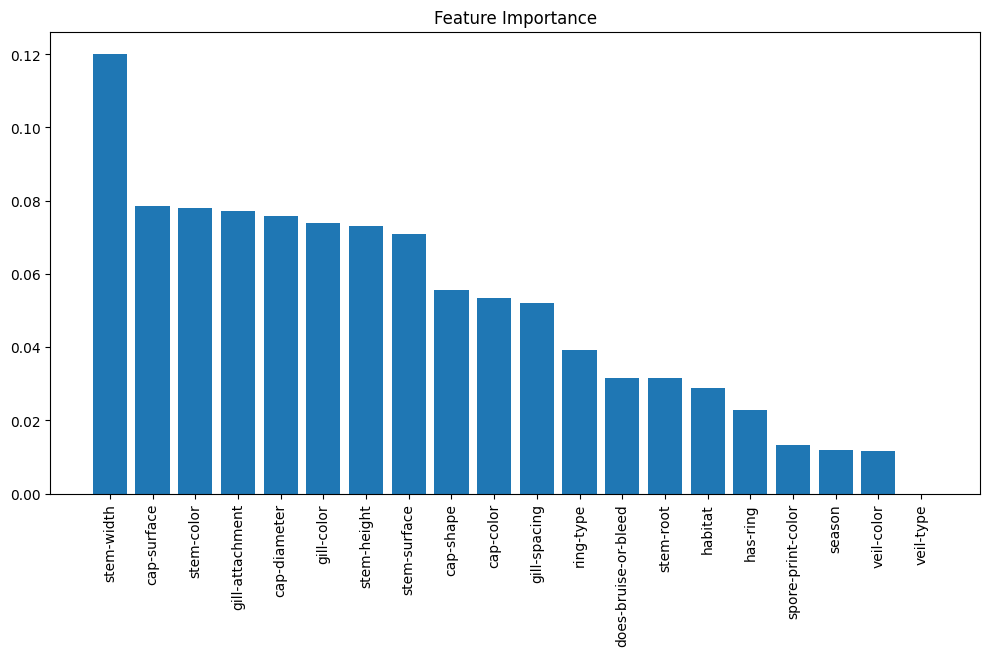

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12, 6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()


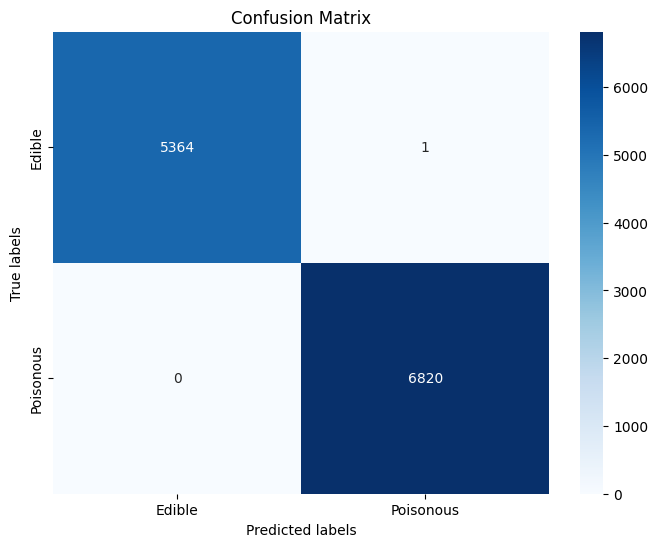

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Initialize EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define the learning rate
learning_rate = 0.001

# Initialize the model
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with EarlyStopping callback
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)


Epoch 1/20
1219/1219 [==============================] - 7s 5ms/step - loss: 0.7306 - accuracy: 0.5741 - val_loss: 0.5770 - val_accuracy: 0.6865
Epoch 2/20
1219/1219 [==============================] - 3s 2ms/step - loss: 0.5523 - accuracy: 0.7017 - val_loss: 0.4392 - val_accuracy: 0.8270
Epoch 3/20
1219/1219 [==============================] - 3s 2ms/step - loss: 0.4425 - accuracy: 0.7883 - val_loss: 0.3217 - val_accuracy: 0.8733
Epoch 4/20
1219/1219 [==============================] - 3s 2ms/step - loss: 0.3787 - accuracy: 0.8297 - val_loss: 0.2623 - val_accuracy: 0.9118
Epoch 5/20
1219/1219 [==============================] - 3s 3ms/step - loss: 0.3457 - accuracy: 0.8494 - val_loss: 0.2189 - val_accuracy: 0.9309
Epoch 6/20
1219/1219 [==============================] - 3s 2ms/step - loss: 0.3148 - accuracy: 0.8673 - val_loss: 0.2076 - val_accuracy: 0.9334
Epoch 7/20
1219/1219 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.8761 - val_loss: 0.1865 - val_accuracy:

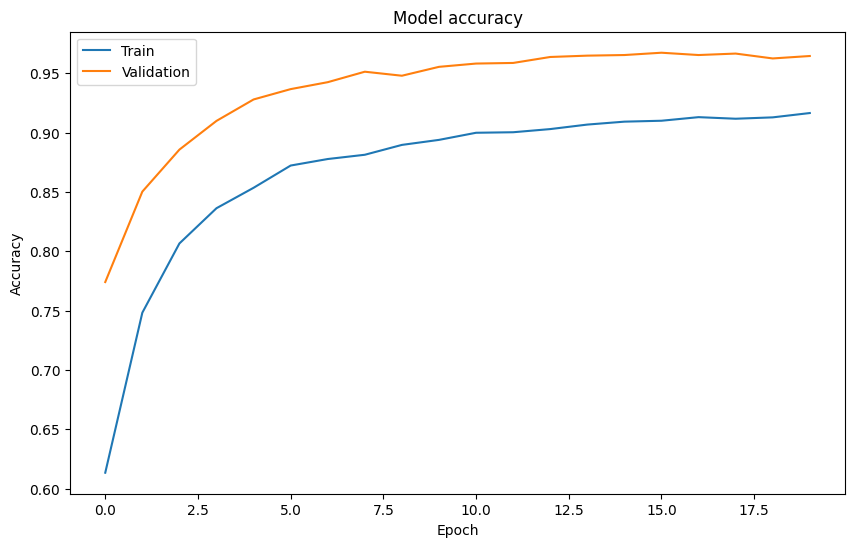

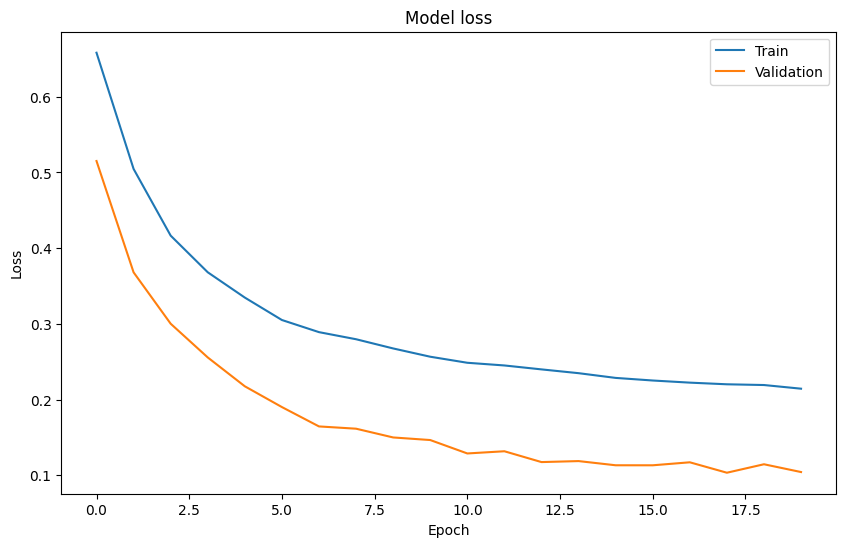

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


381/381 [==============================] - 1s 1ms/step


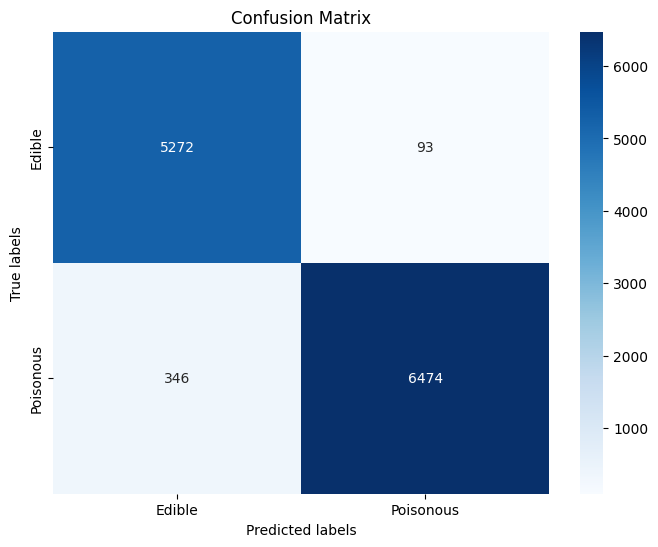

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
